# Informação Adicional

Para calcular o intervalo de confiança de 95%, utilizamos a distribuição \( t \)-Student, apropriada para amostras com tamanho pequeno ou quando a variância populacional é desconhecida. A fórmula da margem de erro é:

$
\text{Margem de erro} = t_{0.975} \cdot \frac{\text{Desvio Padrão}}{\sqrt{n}}
$

Onde:
- $t_{0.975}$ é o valor crítico da distribuição \( t \)-Student para 95% de confiança, considerando \( n - 1 \) graus de liberdade.
- Desvio Padrão ($\sigma$) mede a variabilidade dos tempos de execução.
- \( n \) é o número de execuções realizadas para o tamanho do vetor.

O intervalo de confiança final é definido como:

$
\text{Intervalo de confiança} = \text{Média} \pm \text{Margem de erro}
$

Isso significa que, com 95% de confiança, o valor verdadeiro da média está dentro desse intervalo.


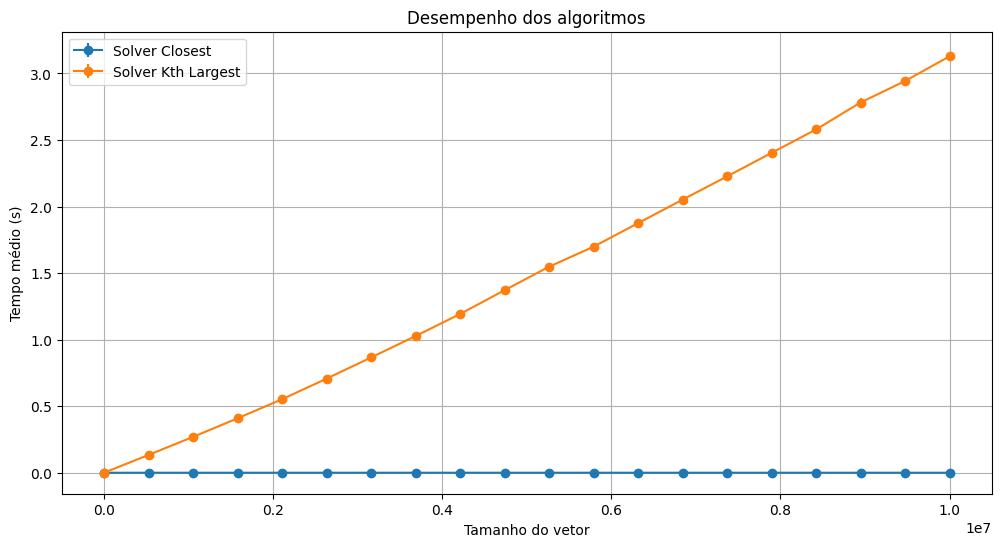

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t
from binarysearchtree import *
import sys
sys.setrecursionlimit(1000000000)

def solver_closest(tree, target):
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

def solver_kth_largest(tree, k):
    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

# Configurações
np.random.seed(42)
N = 10000000  # Tamanho máximo do vetor
steps = 20  # Número de tamanhos de vetor a testar
executions_per_size = 10  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Testar os algoritmos
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    for _ in range(executions_per_size):
        data = np.random.randint(0, 10000000, size)
        bst = BST()

        for value in data:
            bst.add(value)

        # Medir tempo para solver_closest
        start = time()
        solver_closest(bst, 100)
        times_closest.append(time() - start)

        # Medir tempo para solver_kth_largest
        start = time()
        solver_kth_largest(bst, k=5)
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos')
plt.legend()
plt.grid(True)
plt.show()

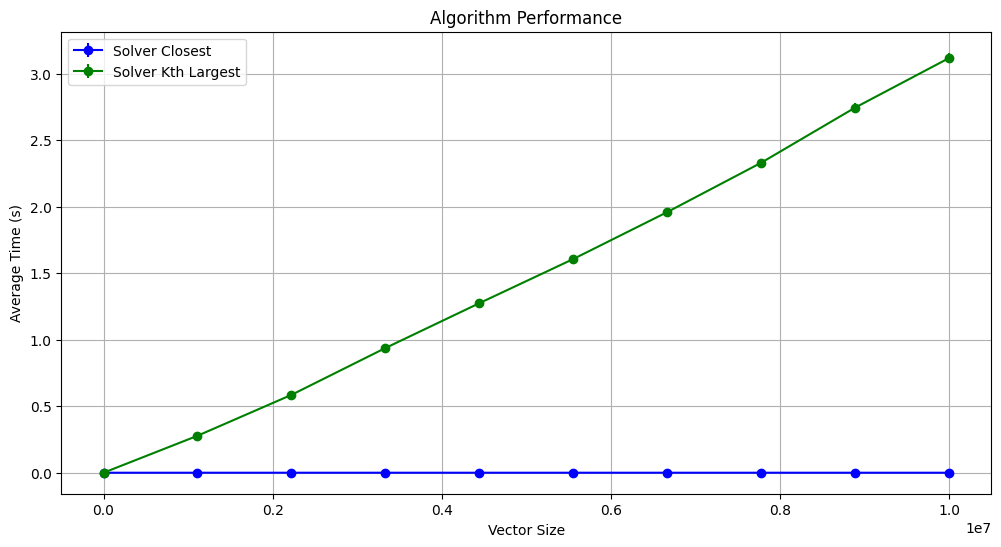

In [15]:
plt.figure(figsize=(12, 6))

# Change the colors of the lines and markers
plt.errorbar(
    vector_sizes, 
    results_closest, 
    yerr=confidence_intervals_closest, 
    label='Solver Closest', 
    fmt='-o', 
    color='blue'
)

plt.errorbar(
    vector_sizes, 
    results_kth_largest, 
    yerr=confidence_intervals_kth_largest, 
    label='Solver Kth Largest', 
    fmt='-o', 
    color='green'
)

plt.xlabel('Vector Size')
plt.ylabel('Average Time (s)')
plt.title('Algorithm Performance')
plt.legend()
plt.grid(True)
#plt.ylim(0, 0.0001)
plt.savefig('grafico1.png', transparent=False, dpi=300)